# 1 . Read CSV file

In [41]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("FuelConsumption.csv")

In [42]:
df.head()


,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.0+ KB


In [44]:
# Print unique values and counts for each column
data=df.copy()
print("MAKE - Unique Values:")
print(data["MAKE"].unique())
print("\nMAKE - Value Counts:")
print(data["MAKE"].value_counts())
print("\n" + "-"*60)

print("MODEL - Unique Values:")
print(data["MODEL"].unique())
print("\nMODEL - Value Counts:")
print(data["MODEL"].value_counts())
print("\n" + "-"*60)

print("VEHICLE CLASS - Unique Values:")
print(data["VEHICLE CLASS"].unique())
print("\nVEHICLE CLASS - Value Counts:")
print(data["VEHICLE CLASS"].value_counts())
print("\n" + "-"*60)

print("TRANSMISSION - Unique Values:")
print(data["TRANSMISSION"].unique())
print("\nTRANSMISSION - Value Counts:")
print(data["TRANSMISSION"].value_counts())
print("\n" + "-"*60)

print("FUEL - Unique Values:")
print(data["FUEL"].unique())
print("\nFUEL - Value Counts:")
print(data["FUEL"].value_counts())
print("\n" + "-"*60)



MAKE - Unique Values:
['ACURA' 'AUDI' 'BMW' 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DAEWOO'
 'DODGE' 'FERRARI' 'FORD' 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI' 'ISUZU'
 'JAGUAR' 'JEEP' 'KIA' 'LAND ROVER' 'LEXUS' 'LINCOLN' 'MAZDA'
 'MERCEDES-BENZ' 'NISSAN' 'OLDSMOBILE' 'PLYMOUTH' 'PONTIAC' 'PORSCHE'
 'SAAB' 'SATURN' 'SUBARU' 'SUZUKI' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO']

MAKE - Value Counts:
MAKE
CHEVROLET        63
FORD             62
DODGE            46
TOYOTA           43
GMC              38
VOLKSWAGEN       36
BMW              29
AUDI             22
MERCEDES-BENZ    22
PONTIAC          21
VOLVO            21
MAZDA            20
CHRYSLER         19
NISSAN           19
HONDA            17
SATURN           15
SUZUKI           13
SUBARU           12
DAEWOO           10
HYUNDAI          10
JAGUAR           10
SAAB              9
ACURA             9
PORSCHE           8
JEEP              8
ISUZU             8
LEXUS             7
FERRARI           7
LINCOLN           6
BUICK             6
OLDSMOBILE 

In [45]:
print(df.shape)
# Clean column names
df.columns = df.columns.str.strip()
print(df.columns)


(639, 10)
Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS'],
      dtype='object')


In [57]:
# Features and target
features = ['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'MAKE', 'TRANSMISSION', 'FUEL']
target = 'COEMISSIONS'


In [58]:
X = df[features]
y = df[target]

In [70]:
# Identify numeric and categorical features
numeric_features = ['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION']
categorical_features = ['MAKE', 'TRANSMISSION', 'FUEL']


# Create pipeline

In [77]:
# Preprocessing transformer
preprocess=ColumnTransformer(
    transformers=[
        ("cat",OneHotEncoder(drop="first",handle_unknown="ignore"),categorical_features),
        ("num","passthrough",numeric_features)
    ]
)

In [78]:
# Create Pipelines for both models
lr_pipeline=Pipeline(steps=[
                         ("preprocess",preprocess),
                         ("model_lr",LinearRegression())
                     ] )

rf_pipeline=Pipeline(steps=[
    ("preprocess",preprocess),
    ("model_rf",RandomForestRegressor(random_state=42))
])


In [79]:
# spilt data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [80]:
# train model
lr_pipeline.fit(x_train,y_train)
rf_pipeline.fit(x_train,y_train)






Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['MAKE', 'TRANSMISSION',
                                                   'FUEL']),
                                                 ('num', 'passthrough',
                                                  ['ENGINE SIZE', 'CYLINDERS',
                                                   'FUEL CONSUMPTION'])])),
                ('model_rf', RandomForestRegressor(random_state=42))])

In [82]:
# # predict
y_pred_lr=lr_pipeline.predict(x_test)
y_pred_rf=rf_pipeline.predict(x_test)


c:\Users\HP\anaconda3\envs\tf2.7\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\HP\anaconda3\envs\tf2.7\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [83]:
# print evaluation
print("R2 Score Linear Regression ",r2_score(y_test,y_pred_lr))
print("R2 Score Random Forest Regression ",r2_score(y_test,y_pred_rf))

print("RSME Linear Regression ",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("RSME Score Random Forest Regression ",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

R2 Score Linear Regression  0.9930314192352492
R2 Score Random Forest Regression  0.9704639612205208
RSME Linear Regression  6.040197045637925
RSME Score Random Forest Regression  12.435265508784637


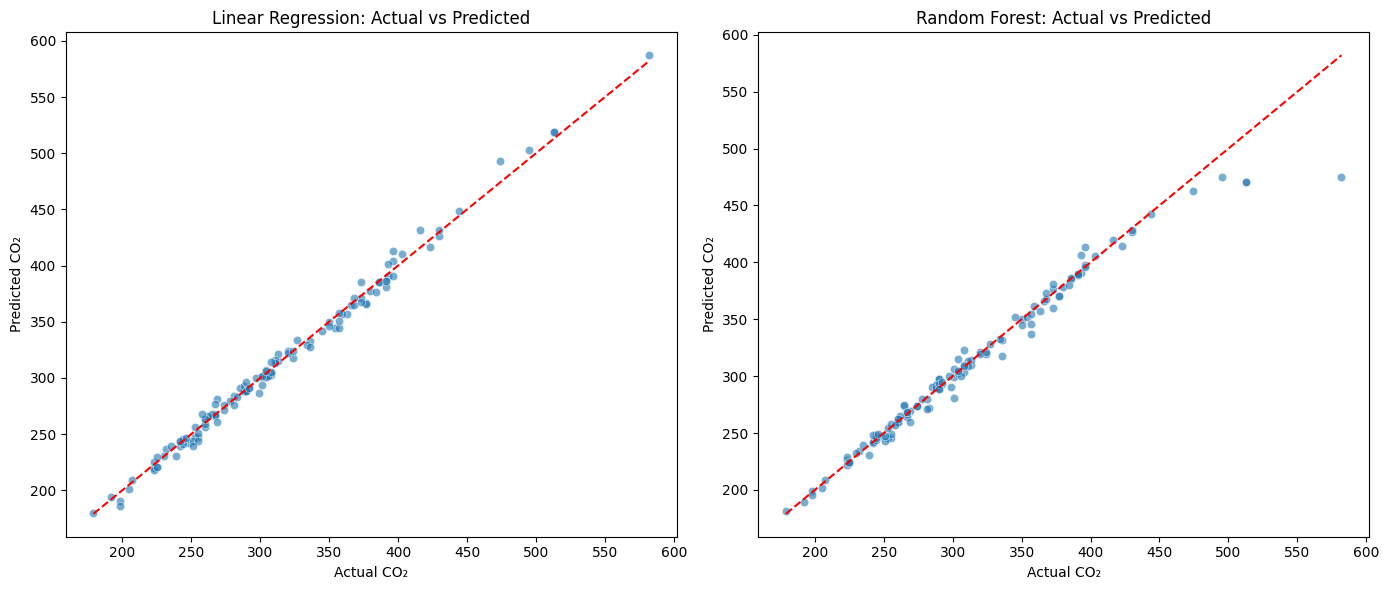

In [84]:
# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel("Actual CO₂")
plt.ylabel("Predicted CO₂")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel("Actual CO₂")
plt.ylabel("Predicted CO₂")

plt.tight_layout()
plt.show()

# Save the model

In [85]:
!pip install joblib

In [86]:
import joblib
joblib.dump(rf_pipeline,"rf_pipeline_model.pkl")
print("Model saved!")


Model saved!
